# Introducción a la Computación Científica con Python

Versión original en inglés de J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

Traducido/Adaptado por [G.F. Rubilar](http://google.com/+GuillermoRubilar).

La última versión de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/gfrubi/clases-python-cientifico](http://github.com/gfrubi/clases-python-cientifico).

La última versión del original (en inglés) de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

Los otros notebooks de esta serie están listados en [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
%matplotlib inline

## Introducción

Existen dos sistemas de álgebra simbólica para Python:

* [SymPy](http://sympy.org/en/index.html) - Un módulo que puede ser usado en cualquier programa Python, o bien en una sesión de IPython, que incluye poderosas herramientas para cálculo simbólico. 
* [Sage](http://www.sagemath.org/) - Sage es un sistema completo y poderoso que intenta suministrar un sistema de código abierto que compita con Mathematica and Maple. Sage no es un módulo de Python, sino un ambiente de cálculo simbólico que usa Python como su lenguaje de programación.

Sage es más poderoso que SymPy en algunos aspectos, pero ambos ofreces una lista completa de funcionalidades de cálculo simbólico. La ventaja de SymPy es que es un módulo normal de Python y se integra muy bien en un notebook de IPython. 

En esta clase veremos cómo usar SymPy en un notebook de IPython.

Para comenzar a usar SymPy en un programa Python o en un notebook, importamos el módulo `sympy`:

In [2]:
from sympy import *

Para que los resultados sean formateados en $\LaTeX$ podemos usar:

In [3]:
init_printing(use_latex=True)

## Variables simbólicas

En SymPy podemos crear símbolos para las variables con las que deseamos trabajar. Podemos crear un nuevo símbolo usando la clase `Symbol`:

In [4]:
x = Symbol('x')

In [5]:
(pi + x)**2

In [6]:
# forma alternativa de definir (varios) símbolos
a, b, c = symbols("a, b, c")

In [7]:
type(a)

sympy.core.symbol.Symbol

Podemos agregar algunas propiedades a los símbolos cuando son creados:

In [8]:
x = Symbol('x', real=True)

In [9]:
x.is_imaginary

False

In [10]:
x = Symbol('x', positive=True)

In [11]:
x > 0

### Números complejos

La unidad imaginaria es denotada por `I` en Sympy. 

In [12]:
1+1*I

In [13]:
I**2

In [14]:
(x * I + 1)**2

### Números racionales

Existen tres tipos distintos de números en SymPy: `Real`, `Rational`, `Integer`: 

In [15]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [16]:
r1

In [17]:
r1+r2

In [18]:
r1/r2

### Evaluación numérica

SymPy usa una librería para trabajar con números con precisión arbitraria, y tiene expresiones SymPy  predefinidas para varias constantes matemáticas, tales como: `pi`, `e` y `oo` para el infinito.

Para evaluar numéricamente una expresión podemos usar la función `evalf` (o bien `N`). Ésta usa un argumento `n` que especifíca el número de cifras significativas.

In [19]:
pi.evalf(n=50)

In [20]:
y = (x + pi)**2

In [21]:
N(y, 5) # equivalente a evalf

Cuando evaluamos numéricamente expresiones a menudo deseamos substituir un símbolo por un valor numérico. En SymPy hacemos esto usando la función `subs`:

In [22]:
y.subs(x, 1.5)

In [23]:
N(y.subs(x, 1.5))

La función `subs` también puede ser usada para substituir símbolos y expresiones:

In [24]:
y.subs(x, a+pi)

También podemos combinar la evaluación numérica de expresiones con arreglos NumPy:

In [25]:
import numpy

In [26]:
x_vec = numpy.arange(0, 10, 0.1)

In [27]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

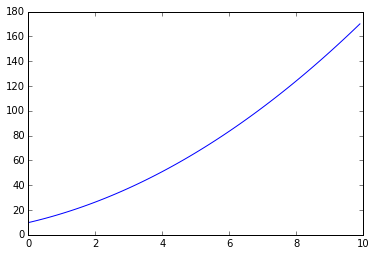

In [28]:
from matplotlib.pyplot import *
plot(x_vec, y_vec);

Sin embargo, este tipo de evaluación numérica puede ser muy lenta, y existe una forma mucho más eficiente de realizar la misma tarea: Usar la función `lambdify` para "mapear" una expresión de Sympy a una función que es mucho más eficiente para la evaluación numérica:

In [29]:
f = lambdify([x], (x + pi)**2, 'numpy')  # el primer argumento es una lista de variables de las que la función f dependerá: en este caso sólo x -> f(x)

In [30]:
type(f)

function

In [31]:
y_vec = f(x_vec)  # ahora podemos pasar directamente un arreglo Numpy. Así f(x) es evaluado más eficientemente

La mayor eficiencia de usar funciones "lambdificadas" en lugar de usar evalación numérica directa puede ser significativa, a menudo de varios órdenes de magnitud. Aún en este sencillo ejemplo obtenemos un aumento de velocidad importante:

In [32]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

100 loops, best of 3: 19.1 ms per loop


In [33]:
%%timeit

y_vec = f(x_vec)

The slowest run took 18.93 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.49 µs per loop


## Manipulaciones algebráicas

Uno de los usos principales de un sistema de cálculo simbólico es que realiza manipulaciones algebráicas de expresiones. Por ejemplo, si queremos expandir un producto, factorizar una expresión, o simplificar un resultado. En esta sección presentamos las funciones para realizar estas operaciones básicas en SymPy.

### Expand and factor

Primeros pasos en la manipulación algebráica

In [34]:
(x+1)*(x+2)*(x+3)

In [35]:
expand((x+1)*(x+2)*(x+3))

La función `expand` acepta varias argumentos clave con los que se puede indicar qué tipo de expansión deseamos realizar. Por ejemplo, para expandir expresiones trigonométricas, usamos el argumento clave `trig=True`:

In [36]:
sin(a+b)

In [37]:
expand(sin(a+b), trig=True)

Ver `help(expand)` para una descripción detallada de los distintos tipos de expansiones que la función `expand` puede realizar.

También podemos factorizar expresiones, usando la función `factor` de SymPy: 

In [38]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplify

La función `simplify` intenta simplificar una expresión usando distinta técnicas. Existen también alternativas más específicas a la función `simplify`: `trigsimp`, `powsimp`, `logcombine`, etc. 

El uso básico de estas funciones en el siguiente:

In [39]:
# simplify expande un producto
simplify((x+1)*(x+2)*(x+3))

In [40]:
# simplify usa identidades trigonometricas
simplify(sin(a)**2 + cos(a)**2)

In [41]:
simplify(cos(x)/sin(x))

## apart and together

Podemos también manipular expresiones simbólicas que involucran fracciones usando las funciones `apart` y `together`. La primera de estas funciones separa una fracción en sus correspondientes fracciones parciales; la segunda hace todo lo contrario.

In [42]:
f1 = 1/((a+1)*(a+2))

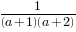

In [43]:
f1

In [44]:
apart(f1)

In [45]:
f2 = 1/(a+2) + 1/(a+3)

In [46]:
f2

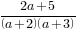

In [47]:
together(f2)

Usualmente `Simplify` combina las fracciones, pero no factoriza: 

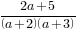

In [48]:
simplify(f2)

## Cálculo

Además de realizar manipulaciones algebráicas, SimPy puede realizar operaciones de cálculo, tales como derivar y derivar expresiones.

### Derivación

Derviar es usualmente algo simple. Usamos la función `diff`. El primer argumento es una expresión que será derivada, y el segundo argumento es el símbolo respecto al cual se realizará la derivada:

In [49]:
y

In [50]:
diff(y**2, x)

Para calcular derivadas de orden superior podemos usar:

In [51]:
diff(y**2, x, x)

o bien

In [52]:
diff(y**2, x, 2) # hace lo mismo

To calculate the derivative of a multivariate expression, we can do:

In [53]:
x, y, z = symbols("x,y,z")

In [54]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [55]:
diff(f, x, 1, y, 2)

### Integration

Integration is done in a similar fashion:

In [56]:
f

In [57]:
integrate(f, x)

ValueError: 
x \cos{\left (y z \right )} + \begin{cases} 0 & \text{for}\: y = 0 \\- \cos{\left (x y \right )} / y & \text{otherwise} \end{cases}
                              ^
Unknown symbol: \begin (at char 30), (line:1, col:31)

             ⎛⎧    0       for y = 0⎞
             ⎜⎪                     ⎟
x⋅cos(y⋅z) + ⎜⎨-cos(x⋅y)            ⎟
             ⎜⎪──────────  otherwise⎟
             ⎝⎩    y                ⎠

By providing limits for the integration variable we can evaluate definite integrals:

In [ ]:
integrate(f, (x, -1, 1))

and also improper integrals

In [ ]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

We can evaluate sums and products using the functions: 'Sum'

In [ ]:
n = Symbol("n")

In [ ]:
Sum(1/n**2, (n, 1, 10))

In [ ]:
Sum(1/n**2, (n,1, 10)).evalf()

In [ ]:
Sum(1/n**2, (n, 1, oo)).evalf()

Products work much the same way:

In [ ]:
Product(n, (n, 1, 10)) # 10!

### Limits

Limits can be evaluated using the `limit` function. For example, 

In [ ]:
limit(sin(x)/x, x, 0)

We can use 'limit' to check the result of derivation using the `diff` function:

In [ ]:
f

In [ ]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [ ]:
h = Symbol("h")

In [ ]:
limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

We can change the direction from which we approach the limiting point using the `dir` keywork argument:

In [ ]:
limit(1/x, x, 0, dir="+")

In [ ]:
limit(1/x, x, 0, dir="-")

### Series

Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

In [ ]:
series(exp(x), x)

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

In [ ]:
series(exp(x), x, 1)

And we can explicitly define to which order the series expansion should be carried out:

In [ ]:
series(exp(x), x, 1, 10)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different order:

In [ ]:
s1 = cos(x).series(x, 0, 5)
s1

In [ ]:
s2 = sin(x).series(x, 0, 2)
s2

In [ ]:
expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

In [ ]:
expand(s1.removeO() * s2.removeO())

But note that this is not the correct expansion of $\cos(x)\sin(x)$ to $5$th order:

In [ ]:
(cos(x)*sin(x)).series(x, 0, 6)

## Linear algebra

### Matrices

Matrices are defined using the `Matrix` class:

In [ ]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [ ]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [ ]:
b = Matrix([[b1], [b2]])
b

With `Matrix` class instances we can do the usual matrix algebra operations:

In [ ]:
A**2

In [ ]:
A * b

And calculate determinants and inverses, and the like:

In [ ]:
A.det()

In [ ]:
A.inv()

## Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [ ]:
solve(x**2 - 1, x)

In [ ]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [ ]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

In [ ]:
solve([x + y - a, x - y - c], [x,y])

## Quantum mechanics: noncommuting variables

How about non-commuting symbols? In quantum mechanics we need to work with noncommuting operators, and SymPy has a nice support for noncommuting symbols and even a subpackage for quantum mechanics related calculations!

In [ ]:
from sympy.physics.quantum import *

### States

We can define symbol states, kets and bras:

In [ ]:
Ket('psi')

In [ ]:
Bra('psi')

In [ ]:
u = Ket('0')
d = Ket('1')

a, b = symbols('alpha beta', complex=True)

In [ ]:
phi = a * u + sqrt(1-abs(a)**2) * d; phi

In [ ]:
Dagger(phi)

In [ ]:
Dagger(phi) * d

Use `qapply` to distribute a mutiplication:

In [ ]:
qapply(Dagger(phi) * d)

In [ ]:
qapply(Dagger(phi) * u)

### Operators

In [ ]:
A = Operator('A')
B = Operator('B')

Check if they are commuting!

In [ ]:
A * B == B * A

In [ ]:
expand((A+B)**3)

In [ ]:
c = Commutator(A,B)
c

We can use the `doit` method to evaluate the commutator:

In [ ]:
c.doit()

We can mix quantum operators with C-numbers:

In [ ]:
c = Commutator(a * A, b * B)
c

To expand the commutator, use the `expand` method with the `commutator=True` keyword argument:

In [ ]:
c = Commutator(A+B, A*B)
c.expand(commutator=True)

In [ ]:
Dagger(Commutator(A, B))

In [ ]:
ac = AntiCommutator(A,B)

In [ ]:
ac.doit()

#### Example: Quadrature commutator

Let's look at the commutator of the electromagnetic field quadatures $x$ and $p$. We can write the quadrature operators in terms of the creation and annihilation operators as:

$\displaystyle x = (a + a^\dagger)/\sqrt{2}$

$\displaystyle p = -i(a - a^\dagger)/\sqrt{2}$


In [ ]:
X = (A + Dagger(A))/sqrt(2)
X

In [ ]:
P = -I * (A - Dagger(A))/sqrt(2)
P

Let's expand the commutator $[x,p]$

In [ ]:
Commutator(X, P).expand(commutator=True).expand(commutator=True)

Here we see directly that the well known commutation relation for the quadratures

$[x,p]=i$

is a directly related to

$[A, A^\dagger]=1$ 

(which SymPy does not know about, and does not simplify).

For more details on the quantum module in SymPy, see:

* http://docs.sympy.org/0.7.2/modules/physics/quantum/index.html
* http://nbviewer.ipython.org/urls/raw.github.com/ipython/ipython/master/docs/examples/notebooks/sympy_quantum_computing.ipynb

## Further reading

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.
